In [1]:
import numpy as np
import playingcards as pc
import matplotlib.pyplot as plt

# Basic examples with card and deck objects

### card examples

Create a card object \
suit method \
rank method \
error if card id out of range \
\
Note: Cards are ordered by suit (spades, clubs, diamonds, hearts), then rank where ace is high.

In [2]:
c1 = pc.card(1)
print(c1.suit())
print(c1.rank())
print(c1)
c1.value
# c2 = card(53)

Spades
3
3 of Spades


4

In [3]:
c1 = pc.card(11)
c2 = pc.card(24)
print(c1, '\n' , c2)
print(c1 > c2)
print(c1 < c2)

King of Spades 
 King of Clubs
False
True


### Deck examples

Create a deck of cards. Deal 5 cards picked randomly from the deck

In [4]:
d1 = pc.deck()

In [12]:
x = d1.deal(5)

`rank` and `suit` methods return the rank and suit.

In [13]:
[str(c.rank()) + ' of ' + c.suit() for c in x]

['9 of Spades',
 'King of Diamonds',
 '10 of Clubs',
 '3 of Clubs',
 '8 of Diamonds']

List all cards in the deck. The card's description can be given by `str(card_object)` which is more succint than the exmaple above using `rank` and `suit`.

In [14]:
[str(c) for c in d1.cards]

['3 of Spades',
 '7 of Spades',
 '8 of Spades',
 '10 of Spades',
 'Jack of Spades',
 'Queen of Spades',
 'Ace of Spades',
 '4 of Clubs',
 '7 of Clubs',
 'Jack of Clubs',
 'Queen of Clubs',
 'King of Clubs',
 'Ace of Clubs',
 '2 of Diamonds',
 '3 of Diamonds',
 '4 of Diamonds',
 '5 of Diamonds',
 '6 of Diamonds',
 '7 of Diamonds',
 'Jack of Diamonds',
 'Queen of Diamonds',
 'Ace of Diamonds',
 '2 of Hearts',
 '4 of Hearts',
 '5 of Hearts',
 '6 of Hearts',
 '7 of Hearts',
 '9 of Hearts',
 '10 of Hearts',
 'Jack of Hearts',
 'Queen of Hearts',
 'Ace of Hearts']

## Card games

### Game 1

The game is 'won' when player 1 and player 2 get face cards

In [15]:
d1 = pc.deck()

n = 10000

win_count = 0

for i in range(n):

    d1.make_deck()

    (c1, c2) = d1.deal(2)

    win = c1.is_face() & c2.is_face()

    if win:
        win_count += 1
        
win_count / n

0.0894

#### Caluclated probaility

Player 1 and player two are dealt a card. What is the probality that both get face cards?\
\
There are 4*4=16 face cards in the deck. There are 16/52 ways for player one to get a face card, and subsequently 15/51 for the player two to get a face card.\
\
Alternatively there are $\left(\begin{gather} 16 \\ 2 \end{gather} \right)$ ways to pick two face cards and $P(2,2)=2 !$ to order these over the two players. Hence there are $\left(\begin{gather} 16 \\ 2 \end{gather} \right) P(2,2) = P(16,2) = 16 * 15$ ways to give two players face cards. Similarly there are $P(52,2)=\left(\begin{gather} 52 \\ 2 \end{gather} \right)P(2,2) $$= \left(\begin{gather} 52 \\ 1 \end{gather} \right) $$ \left(\begin{gather} 51 \\ 1 \end{gather} \right)$ ways to give the two players any two face cards.

In either case the result is
$$
\frac{16 \cdot 15}{52 \cdot 51}
$$


In [320]:
16 * 15 / (52 * 51)

0.09049773755656108

### Game 2

Win if player 1 gets face card and player two doesn't, or both get face cards and player 1 gets a higher value face card than player 2.

In [16]:
d1 = pc.deck()

n = 10000

win_count = 0

for i in range(n):

    d1.make_deck()

    (c1, c2) = d1.deal(2)

    # print(c1)
    # print(c2)

    if c1.is_face():
        if c2.is_face():
            win = c1 > c2
        else:
            win = True
    else:
        win = False
    
    if win:
        win_count += 1
        
win_count / n

0.2657

Let $A$ be the event where player 1 gets a face card

Let $B$ be the event where player 2 gets a face card

Then to win we must have $A \cap \bar{B}$ or $A \cap B$ with player one having a higher value card. Thus
$$ P(W) = P(A\cap \bar B) + P(A\vert A\cap B) P(A \cap B) $$

In the event of $A\cap B$ then there is a $50:50$ chance of either player winning, i.e. $P(W\vert A\cap B)=0.5$

To calculate $P(W)$ we need the number of ways that $A \cap B$ and $A \cap \bar B$ can happen as well as the total number of ways a card can be dealt to each player ($P(52,2)$).

For $A\cap B$ we simply pick two face cards and give them to two players, for which there are $P(16,2)$ ways.

For $A \cap \bar B$ there are 16 ways to pick a face card for player 1, and 52-16=36 ways to give player 2 a non-face card.

Thus
$$\begin{align}
P(W) &= \frac{\frac 12 \cdot 16 \cdot 15 + 16\cdot36}{52 \cdot 51} \\
&= \frac{120 + 576}{52 \cdot 51} \\
&=\frac{696}{2652}
\end{align}
$$

In [17]:
696/2652

0.26244343891402716

### Game 3

As game two, but each go I put down an ante of £1. If I win I get £2 back plus my ante, other wise I lose my ante.

In [351]:
d1 = deck()

n = 10000

profit = 0

for i in range(n):

    d1.make_deck()

    (c1, c2) = d1.deal(2)

    # print(c1)
    # print(c2)

    if c1.is_face():
        if c2.is_face():
            win = c1 > c2
        else:
            win = True
    else:
        win = False
    
    if win:
        profit += 2
    else:
        profit -= 1
        
profit

-2125

Expected profit after one go is $2 P(W) - 1 P(\bar W) = 2 P(W) - (1-P(W)) = 3 P(W) - 1 = -\frac{564}{2652}$.

Over $n$ games the expected profic is $E[P] = n (3 P(W)-1)$

In [352]:
-(564/2652) * n

-2126.6968325791854

### Game 4

Like game 3 but I can choose to double the ante, A, after seeing only my card. If I win then I recieve A plus my ante back. If I loose then I loose my ante, A.

Strategy 1: always double my ante from £1 to £2 when I get a face card.

In [19]:
d1 = pc.deck()

n = 10000

profit = 0

for i in range(n):
    
    A = 1

    d1.make_deck()

    (c1, c2) = d1.deal(2)

    # print(c1)
    # print(c2)

    if c1.is_face():
        
        A = 2
        
        if c2.is_face():
            win = c1 > c2
        else:
            win = True
    else:
        win = False
    
    if win:
        profit += A
    else:
        profit -= A
        
profit

-2547

Given my strategy of doubling ante if I get a face card then in the event:
1. $A \cap \bar B$ I win $2a$
2. $A \cap B$ I win $2a$ half the time
3. $A\cap B$ I lose $2a$ half the time
4. $\bar A$ I lose a
Cases 2 and 3 cancel each other out, so for each round the expected pofit is
$$
2 a P(A\cap \bar B) - a P(\bar A).
$$
Since the profit after each round is an independently random variable $X_i$, and for independent random variables 
$$
E\left[\sum_i X_i\right] = \sum_i E[X_i]
$$
the expected profit after n rounds is
$$
\begin{align}
E[X] &= n a (2 P(A \cap \bar B) - P(\bar A)) \\
&= - n \frac{684}{2652}
\end{align}
$$
where $X = \sum_{i=1}^n X_i$.

In [22]:
-n * 684 / 2652

-2579.185520361991

Suppose we can choose the factor $\lambda$ by which we increase our ante. Then 
$$
E[X] = n a (\lambda P(A\cap\bar B) - P(\bar A)
$$
From this expression above for $E[X]$ it is clear that to break even we must choose
$$
\begin{gather}
    \lambda P(A \cap \bar B) - P(\bar A) = 0 \\
    \implies \lambda = \frac{P(\bar A)}{P(A\cap \bar B)} = \frac{51}{16}
\end{gather}
$$

Let's simulate the break even strategy to find the profit after 100 games. I'll repeat this experiment 5000 times and build a histogram of the expectation value of $X=\sum_{i=1}^{100} X_i$.

In [108]:
d1 = pc.deck()

n = 100

m = 5000

profits = np.array([], int)

for j in range(m):

    profit = 0

    for i in range(n):

        A = 1

        d1.make_deck()

        (c1, c2) = d1.deal(2)

        # print(c1)
        # print(c2)

        if c1.is_face():

            A = 51/16

            if c2.is_face():
                win = c1 > c2
            else:
                win = True
        else:
            win = False

        if win:
            profit += A
        else:
            profit -= A

    profits = np.append(profits, profit)

The variance of the profit after each round is
$$
\begin{align}
\mathrm{Var}(X_i) &= E[X_i^2] - E^2[X_i] \\
&= E[X_i^2] \\
&= a^2 \lambda^2 \left[P(A \cap \bar B + \frac12 P(A \cap B) + \frac12 P(A \cap B)\right] + a^2 P(\bar A)) \\
   & = \frac{51^2+16 \cdot 36}{16 \cdot 52}
\end{align}
$$
since $E[X]=0$ for $\lambda = 51/16$ and $a=1$.

For idenpendant random variables $X_1,X_2,...$ the variance $\mathrm{Var}(X_1+X_2+...) = \mathrm{Var}(X_1)+ \mathrm{Var}(X_2)+...$.
So the variance for $n$ games is 
$$
\begin{align}
\mathrm{Var}\left( \sum_{i=1}^{n} X_i \right) &=
n \mathrm{Var}(X_i)\\
&= n \frac{51^2+16 \cdot 36}{16 \cdot 56}
\end{align}
$$
and the standard deviation $\sigma = \sqrt{\mathrm{Var}(X)}$

In [110]:
std = np.sqrt(n*(51**2 + 16*36) / (16 * 52))
std

19.54100717819994

In [74]:
np.sqrt(sum(profits**2) / m - (sum(profits) / m)**2)

19.5183382345296

In [111]:
def normal(mu, sigma, x):
    return (2*np.pi)**(-1/2) * 1/sigma * np.exp(- (x-mu)**2 / (2 * sigma**2))

X = np.arange(-60,61,1)
pdf = np.array([normal(0, std, x) for x in X])

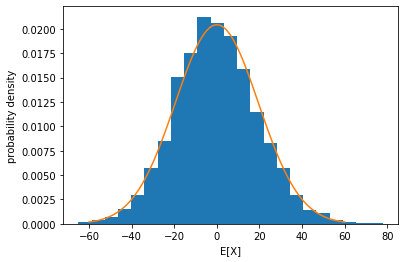

In [112]:
fig, ax = plt.subplots(1,1)
ax.hist(profits, bins = 23,density=True)
ax.set_xlabel('E[X]')
ax.set_ylabel('probability density')
ax.plot(X,pdf)
plt.show()

If we increase $\lambda$ further than how does $E[X]$ compare to $\sigma_X$, what is their Sharpe ratio $S(X)=E[X]/\sigma_X$?

$$
\begin{align}
E[X] &= n a (\lambda P(A \cap \bar B) - P(\bar A)) \\
&= n a \frac{36}{52\cdot 51} \left(16 \lambda -51 \right)
\end{align}
$$
while
$$
\begin{align}
\mathrm{Var}(X) &= n a^2 \left[ \lambda^2 P(A) + P(\bar A) \right] \\
&=n a^2 \frac{16 \lambda^2 + 36}{52} \\
&= \sigma_X^2
\end{align}
$$
So the Sharpe ratio is
$$
\begin{align}
S_X &= \frac{E[X]}{\sigma_X} \\
&= 
n a \frac{\frac{36}{52 \cdot 51} (16 \lambda - 51)}{\sqrt{n} a \sqrt{\frac{16 \lambda^2 + 36}{52}}} \\
&= \sqrt{n} \frac{36}{\sqrt{52}\cdot 51}\frac{16 \lambda - 51}{\sqrt{16 \lambda^2 + 36}}
\end{align}
$$

So $S_X \propto \sqrt{n}$ and for $\lambda \gg 51/16$ is $S_X \approx \frac{4 \cdot 36}{\sqrt{52}\cdot 51} \sqrt{n}$

In [113]:
4 * 36 / (np.sqrt(52) * 51)

0.39155307968839703

## Games with pairs

### two_card_hand object examples

In [39]:
d1 = pc.deck()

h1 = pc.two_card_hand(d1.deal(2))
h2 = pc.two_card_hand(d1.deal(2))

In [42]:
[print(c) for c in h1.cards];
[print(c) for c in h2.cards];

Jack of Spades
Ace of Hearts
10 of Clubs
Ace of Spades


In [46]:
h1.value
h2.value
test = h1.value > h2.value
print(test)

True


In [38]:
h1.findpairs()

True

### Two card hand game 1

In [47]:
def win(my_hand, opponent_hand):
    have_pair = my_hand.findpairs()
    better_hand = my_hand.value > opponent_hand.value
    if have_pair and better_hand:
        i_win = True
    else:
        i_win = False
    return i_win

In [200]:
def exp_val_wins(n_trials):
    win_count = 0

    for i in range(n_trials):

        d = pc.deck()
        h1 = two_card_hand(d.deal(2))
        h2 = two_card_hand(d.deal(2))

        won = h1.findpairs() and not h2.findpairs()
    #     won = win(h1, h2)

        if won:
            win_count +=1

    return win_count / n_trials

In [201]:
reps = 500
data = np.array([exp_val_wins(200) for i in range(reps)])

In [202]:
print(np.mean(data))
print(np.sqrt(np.var(data)))
print(np.sqrt(np.var(data)/reps))

0.05489
0.01650569295727992
0.0007381570293643488


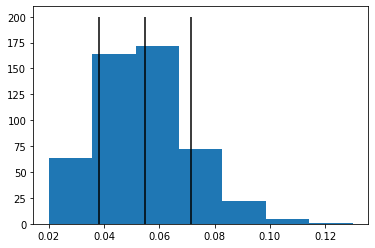

In [209]:
mean_val = np.mean(data)
std_dev = np.sqrt(np.var(data))
fig, ax = plt.subplots(1,1)
plt.hist(data, bins = 7)
ax.vlines([mean_val - std_dev, mean_val, mean_val + std_dev], 0, 200)
plt.show()

Analytic calculation of win probability

In [152]:
def c(n, k):
    if k > n:
        raise Exception("second argument, k, must be a positive integer less than or equal to first argument, n.")
    elif k < 0:
        raise Exception("second argument, k, must be greater than or equal to 0.")
    elif n < 0:
        raise Exception("first argument, n, must be greater than or equal to 0.")
    nn = 1
    factor = n
    m1 = max(k, n-k)
    m2 = min(k, n-k)
    while factor > m1:
        nn *= factor
        factor -= 1
    d = 1
    factor = m2
    while factor > 0:
        d *= factor
        factor -= 1
    if (nn/d) % 1 == 0:
        c = int(nn/d)
    else:
        c = nn/d
    return c

In [153]:
n=6
print(sum([c(n,k) for k in range(n+1)]))
print(2**n)

64
64


In [163]:
print(c(13,1)*c(4,2)*( c(12,2)*c(4,1)**2 + c(1,1)*c(2,1)*c(12,1)*c(4,1) ))
c(13,2)*c(4,1)**2 * ( c(2,1)* c(3,2) + c(11,1)*c(4,2))

89856


89856

In [205]:
c(13,2)*c(4,1)**2 * ( c(2,1)* c(3,2) + c(11,1)*c(4,2)) / (c(52,2)*c(50,2))

0.05531812725090036

In [206]:
c(13,1)*c(4,2) / c(52,2)

0.058823529411764705

### Two card hand: Games 2

Two players are each dealt two cards. The player with the highest value card wins.

#### Numerical simulation

In [136]:
import time
import copy

In [202]:
n = 100
m = 500

d = pc.deck()
h1 = pc.hand(d.deal(2))
v1 = max([c.value for c in h1.cards])

st = time.time()

winprob = []

for i in range(m):

    wincount = 0

    for i in range(n):

        d_i = copy.deepcopy(d)
        h2 = pc.hand(d_i.deal(2))
        v2 = max([c.value for c in h2.cards])

        if v1 > v2:
            wincount += 1
            
    winprob.append(wincount / n)

et = time.time()
 
print(v1) 
# print(wincount / n)
print(et-st)

40
76.75236988067627


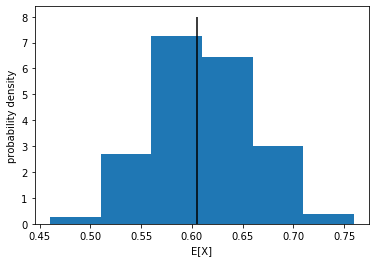

In [204]:
fig, ax = plt.subplots(1,1)
ax.hist(winprob, bins = 6,density=True)
ax.set_xlabel('E[X]')
ax.set_ylabel('probability density')
# ax.plot(X,pdf)
ax.vlines([(v1-1)*(v1-2)/(50*49)], 0, 8)
plt.show()

#### Analytic calculation of probability of winning

When each player has the choice of two cards, what is the probability that player 1 wins? This clearly depends on the value player 1's hand, which I assume they know.

To understand this problem, we number the cards in the deck from 1 to 52 in order of ascending value, e.g. \
2 of spades has value 1, \
2 of clubs has value 2, \
2 of diamonds has value 3, \
2 of hearts has value 4,\
$\vdots$ \
Ace of hearts has value 52.

Let player 1 have hand of value $n$, i.e. their highest card is the $n^{\mathrm{th}}$ highest card in the deck. Then for player 1 to win, player 2 can have any two cards lower than value $n$. That is player two must have highest card of value $n-1$ or lower. Since player one has two cards, we can rank the remaining 50 cards in the deck in ascending order from 1 to 50. Now the card which was previously the $(n-1)^{\mathrm{th}}$ highest card in the full deck is the $(n-2)^{\mathrm{th}}$ highest card in the deck once we have taken out player 1's lowest card which is also less than $n$.

There are exacly $\left(\begin{gather} n-2 \\ 2 \end{gather}\right)$ ways to pick two cards from the $n-2$ cards that reamin in the deck and have value lower than $n$. There are a total of $\left( \begin{gather} 50 \\2 \end{gather} \right)$ ways to pick player twos card given player one has two cards. Thus the probability of the event $W_1$ where player 1 wins is
$$\begin{align}
P(W_1\vert n) &= \frac{\left(\begin{gather} n-2 \\ 2 \end{gather} \right)}{ \left(\begin{gather} 50 \\ 2 \end{gather} \right)} \\
&= \frac{(n-2)(n-3)}{50 \cdot 49}
\end{align}
$$


$P(W_1\vert n)$ increases quadratically with n, the value of their highest card. If we were gambling, then given the opportunity we would want to raise our bet if we have n such that $P(W_1 \vert n) > 0.5$. Solving this quadratic inequality we find this occurs when $n>37.5$. After this point (a card of value 38 or higher , i.e. 9 of diamonds or better) the probability of winning grows quite quickly.

In [26]:
print(pc.card(37))

King of Diamonds


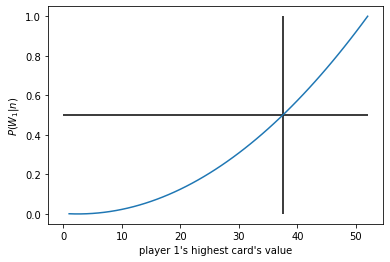

In [23]:
N = range(1,53,1)
pwn = [(n-2)*(n-3)/50/49 for n in N]
fig, ax = plt.subplots()
ax.plot(N, pwn)
ax.set_xlabel("player 1's highest card's value")
ax.set_ylabel(r'$P(W_1 \vert n)$')
ax.vlines(37.5,0,1)
ax.hlines(0.5,0,52)
plt.show()

In [213]:
[pc.card(0)]

In [228]:
from importlib import reload
reload(pc)

<module 'playingcards' from '/Users/benjaminyuen/Google Drive/personal/Prob_Stats/cardgames/playingcards/__init__.py'>

In [2]:
c1 = pc.card(0)
c1

In [3]:
c2 = pc.card(0)
c2

In [4]:
c1 == c2

True

In [5]:
c1.value == c2.value

True

In [6]:
d0 = pc.deck()
d0.removecards([pc.card(0),])
len(d0.cards)

AttributeError: 'list' object has no attribute 'value'

In [215]:
print(d0.cards[0])

2 of Spades


In [ ]:
d0 = pc.deck()
d0.removecards([pc.cards(0)])

n = 100

pc.card(0)

for card in d0:

    d = pc.deck()
    h1 = pc.hand(d.deal(2))
    v1 = max([c.value for c in h1.cards])

    st = time.time()

    winprob = []

    wincount = 0

    for i in range(n):

        d_i = copy.deepcopy(d)
        h2 = pc.hand(d_i.deal(2))
        v2 = max([c.value for c in h2.cards])

        if v1 > v2:
            wincount += 1
            
    winprob.append(wincount / n)